# Demo: Linear Regression

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Data Loading and Visualization

In [2]:
# Read salary data
file_path = "https://static.bc-edx.com/mbc/ai/m3/datasets/salary-data.csv"
df_salary = pd.read_csv(file_path)

# Display sample data
df_salary.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Axes: title={'center': 'Expected Salary Based on Years of Experience'}, xlabel='years_experience', ylabel='salary'>

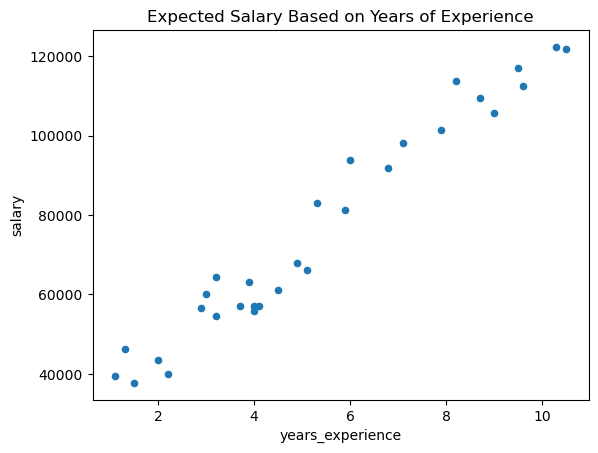

In [3]:
# Create a scatter plot with the salary information
salary_plot = df_salary.plot.scatter(
    x="years_experience",
    y="salary",
    title="Expected Salary Based on Years of Experience"
)
salary_plot

## Data Preparation

In [4]:
# Reformat data of the independent variable X as a single-column array
X = df_salary["years_experience"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2]])

In [5]:
# The shape of X is 30 samples, with a single feature (column)
X.shape

(30, 1)

In [6]:
# Create an array for the dependent variable y
y = df_salary["salary"]

## Building the Linear Regression Model

In [7]:
# Create a model with scikit-learn
model = LinearRegression()

In [8]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [9]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [9449.96232146]


In [10]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 25792.20019866869


In [11]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 25792.20019866869 + 9449.962321455077X


In [12]:
# Display the formula to predict the salary for a person with 7 years of experience
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 7")

# Predict the salary for a person with 7 years of experience
y_7 = model.intercept_ + model.coef_[0] * 7

# Display the prediction
print(f"Predicted salary for a person with 7 years of experience: ${y_7:.2f}")

Model's formula: y = 25792.20019866869 + 9449.962321455077 * 7
Predicted salary for a person with 7 years of experience: $91941.94


In [13]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [14]:
# Create a copy of the original data
df_salary_predicted = df_salary.copy()

# Add a column with the predicted salary values
df_salary_predicted["salary_predicted"] = predicted_y_values

# Display sample data
df_salary_predicted.head()

,years_experience,salary,salary_predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


<Axes: xlabel='years_experience'>

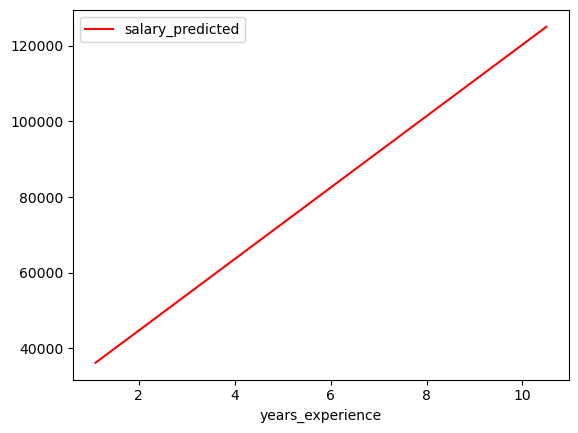

In [15]:
# Create a line plot of the predicted salary values
best_fit_line = df_salary_predicted.plot.line(
    x = "years_experience",
    y = "salary_predicted",
    color = "red"
)
best_fit_line

<Axes: title={'center': 'Expected Salary Based on Years of Experience'}, xlabel='years_experience', ylabel='salary'>

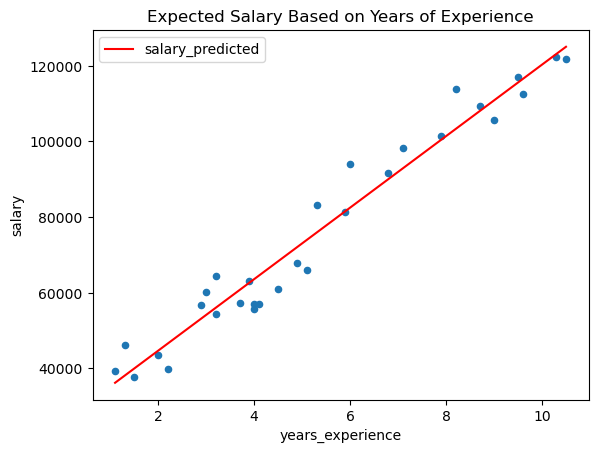

In [16]:
# Plot salary scatter and best fit line together
salary_plot = df_salary_predicted.plot.scatter(
    x="years_experience",
    y="salary",
    title="Expected Salary Based on Years of Experience"
)

# Create a line plot of the predicted salary values
best_fit_line = df_salary_predicted.plot.line(
    x = "years_experience",
    y = "salary_predicted",
    color = "red",
    ax=salary_plot
)
salary_plot

## Linear Regression Model Assessment

In [17]:
# Import relevant metrics - score, r2, mse, rmse - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Compute the metrics for the linear regression model
score = round(model.score(X, y, sample_weight=None),5)
r2 = round(r2_score(y, predicted_y_values),5)
mse = round(mean_squared_error(y, predicted_y_values),4)
rmse = round(np.sqrt(mse),4)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The score is 0.95696.
The r2 is 0.95696.
The mean squared error is 31270951.7223.
The root mean squared error is 5592.0436.
